In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import svm
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
import pingouin as pg
import import_ipynb
from scipy.stats import ks_2samp
from statsmodels.stats.weightstats import ztest as ztest

1.25.2
2.0.3
3.11.4 (main, Jul  5 2023, 13:45:01) [GCC 11.2.0]


/home/am275/.conda/envs/Jupyter-notebook/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# Calculate mean hydrophobicity of  sub-sequence of length $2r_c+1(r_c=14)$ (Wimley-White Scale)

## Wimley, W. C.; White, S. H. Experimentally determined hydrophobicity scale for proteins at membrane interfaces. Nat. Struct. Biol. 1996, 3, 842–848.

In [2]:
# Define the Wimley-White hydrophobicity scale as a dictionary
hydrophobicity_scale = {
    'A': 0.17, 'R': 0.81, 'N': 0.42, 'D': 1.23, 'C': -0.24,
    'Q': 0.58, 'E': 2.02, 'G': 0.01, 'H': 0.96, 'I': -0.31,
    'L': -0.56, 'K': 0.99, 'M': -0.23, 'F': -1.13, 'P': 0.45,
    'S': 0.13, 'T': 0.14, 'W': -1.85, 'Y': -0.94, 'V': 0.07
}

def calculate_hydrophobicity_and_mean(protein_sequence):
    hydrophobicity = 0.0
    num_aa = 0
    for aa in protein_sequence:
        if aa in hydrophobicity_scale:
            hydrophobicity += hydrophobicity_scale[aa]
            num_aa += 1
    if num_aa != 0:
        mean_hydrophobicity = hydrophobicity / num_aa
    else:
        mean_hydrophobicity = None
    return hydrophobicity, mean_hydrophobicity

# Read sequences from file
with open("holin_mutated_seq_around_rc_14.txt", "r") as file:
    sequences = [line.strip() for line in file if not line.startswith(">")]

# Calculate and print average hydrophobicity for each sequence
print(f"Avg_Hydrophobicity")
for sequence in sequences:
    hydrophobicity, _ = calculate_hydrophobicity_and_mean(sequence)
    num_aa = len(sequence)
    average_hydrophobicity = hydrophobicity / num_aa
    #print(f"Average hydrophobicity for sequence '{sequence}': {average_hydrophobicity}")
    print(f"{average_hydrophobicity:.3f}")
    

Avg_Hydrophobicity
0.326
0.270
0.233
0.240
0.196
0.195
0.127
0.093
0.098
-0.012
0.024
0.027
-0.002
-0.079
-0.012
-0.059
-0.055
-0.073
0.001
-0.223
-0.212
-0.083
-0.064
-0.076
-0.129
-0.118
-0.085
-0.046
-0.102
-0.064
0.264


# Correlation between MFPT and Mean Local Hydrophobicity

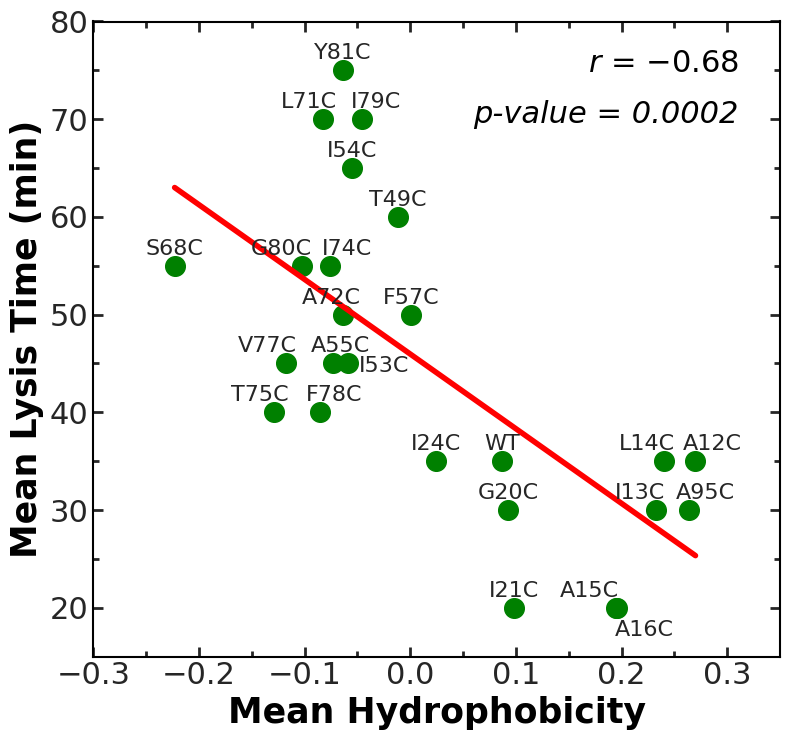

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator  # Import AutoMinorLocator
from scipy.stats import pearsonr

# Read data from file
data_file = "MFPT_Average_Hydrophobicity.txt"

mutants = []
mfpt = []
mean_hydrophobicity = []

# Corrected mutant names
name_list_corrected = {
    "WT": "WT",
    "H7C": "H7C",
    "A12C": "A12C",
    "I13C": "I13C",
    "L14C": "L14C",
    "A15C": "A15C",
    "A16C": "A16C",
    "K17C": "K17C",
    "G20C": "G20C",
    "I21C": "I21C",
    "A23C": "A23C",
    "I24C": "I24C",
    "F27C": "F27C",
    "A28C": "A28C",
    "V45C": "V45C",
    "T49C": "T49C",
    "I53C": "I53C",
    "I54C": "I54C",
    "A55C": "A55C",
    "F57C": "F57C",
    "S68C": "S68C",
    "S69C": "S69C",
    "L71C": "L71C",
    "A72C": "A72C",
    "I74C": "I74C",
    "T75C": "T75C",
    "V77C": "V77C",
    "F78C": "F78C",
    "I79C": "I79C",
    "G80C": "G80C",
    "Y81C": "Y81C",
    "A95C": "A95C",
}

with open(data_file, 'r') as file:
    next(file)  # Skip the header line
    for line in file:
        parts = line.strip().split()
        mutant = parts[0]
        mfpt_val = float(parts[1])
        mean_hydrophobicity_val = float(parts[2])

        # Filter based on condition (MFPT < 55)
        if mfpt_val < 200:
            mutants.append(name_list_corrected[mutant])
            mfpt.append(mfpt_val)
            mean_hydrophobicity.append(mean_hydrophobicity_val)

# Calculate Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(mean_hydrophobicity, mfpt)

# Plot
plt.figure(figsize=(8, 7.5))
#plt.errorbar(mean_hydrophobicity, mfpt, yerr=stderr_mfpt, fmt='o', color='blue', capsize=5, markersize=10)  # Include error bars
#plt.plot(mean_hydrophobicity, mfpt, fmt='o', color='blue', capsize=5, markersize=10)  # Include error bars
plt.scatter(mean_hydrophobicity, mfpt, color='green', s=200)  # Scatter plot

# Draw correlation line
plt.plot(np.unique(mean_hydrophobicity), np.poly1d(np.polyfit(mean_hydrophobicity, mfpt, 1))(np.unique(mean_hydrophobicity)), color='red', linewidth=4)

# Annotate each point with mutant name
#for i, mutant in enumerate(mutants):
#    plt.annotate(mutant, (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=16)
for i, mutant in enumerate(mutants):
    if mutant == "L71C":
        plt.annotate("L71C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(-10,8), ha='center', fontsize=16)
    elif mutant == "I79C":
        plt.annotate("I79C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(10,8), ha='center', fontsize=16)
    elif mutant == "G80C":
        plt.annotate("G80C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(-15,8), ha='center', fontsize=16)
    elif mutant == "I74C":
        plt.annotate("I74C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(12,8), ha='center', fontsize=16)
    elif mutant == "V77C":
        plt.annotate("V77C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(-13,8), ha='center', fontsize=16)
    elif mutant == "A72C":
        plt.annotate("A72C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(-8,8), ha='center', fontsize=16)
    elif mutant == "A55C":
        plt.annotate("A55C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(5,8), ha='center', fontsize=16)
    elif mutant == "I53C":
        plt.annotate("I53C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(26,-6), ha='center', fontsize=16)
    elif mutant == "T75C":
        plt.annotate("T75C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(-10,8), ha='center', fontsize=16)
    elif mutant == "F78C":
        plt.annotate("F78C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(10,8), ha='center', fontsize=16)
    elif mutant == "L14C":
        plt.annotate("L14C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(-12,8), ha='center', fontsize=16)
    elif mutant == "A12C":
        plt.annotate("A12C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(12,8), ha='center', fontsize=16)
    elif mutant == "I13C":
        plt.annotate("I13C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(-12,8), ha='center', fontsize=16)
    elif mutant == "A95C":
        plt.annotate("A95C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(12,8), ha='center', fontsize=16)
    elif mutant == "A15C":
        plt.annotate("A15C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(-20,8), ha='center', fontsize=16)
    elif mutant == "A16C":
        plt.annotate("A16C", (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(20,-20), ha='center', fontsize=16)
    else:
        plt.annotate(mutant, (mean_hydrophobicity[i], mfpt[i]), textcoords="offset points", xytext=(0,8), ha='center', fontsize=16)


plt.axis([-0.3, 0.35, 15, 80])
plt.xlabel('Mean Hydrophobicity', fontsize=25, color='black', fontweight='bold')
plt.ylabel('Mean Lysis Time (min)', fontsize=25, color='black', fontweight='bold')
#plt.title(f'Pearson Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=20, color='red', fontweight='bold')

plt.tick_params(axis='x', which='major', bottom=True, top=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='x', which='minor', bottom=True, top=True, direction='in', labelsize=22, width=2, length=4)
plt.tick_params(axis='y', which='major', left=True, right=True, direction='in', labelsize=22, width=2, length=7)
plt.tick_params(axis='y', which='minor', left=True, right=True, direction='in', labelsize=22, width=2, length=4)
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().yaxis.set_minor_locator(AutoMinorLocator(2))
plt.rcParams["axes.edgecolor"]="black"
plt.rcParams["axes.linewidth"]=1.5

# Display p-value
#plt.text(-0.14, 1.1, "B", transform=plt.gca().transAxes, fontsize=35, fontweight='bold', va='top')
plt.text(0.94, 0.92, f'r = ${correlation_coefficient:.2f}$', transform=plt.gca().transAxes, fontsize=22, ha='right', color='black', style='italic')
plt.text(0.94, 0.84, f'p-value = {p_value:.4f}', transform=plt.gca().transAxes, fontsize=22, ha='right', color='black', style='italic')
#plt.ylim(15,80)

plt.grid(False)
#plt.savefig('S8B_R14.pdf', bbox_inches='tight')
plt.tight_layout()
plt.show()
